In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 블러 필터 (Blur Filter)

In [27]:
src=cv2.imread("Lenna.png",cv2.IMREAD_COLOR)
src=cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

dst1=cv2.boxFilter(src,ddepth=-1, ksize=(7,7))
dst2=cv2.bilateralFilter(src,d=11,sigmaColor=10,sigmaSpace=10) 
dst3=cv2.medianBlur(src,ksize=7)
dst4=cv2.blur(src,ksize=(7,7))
dst5=cv2.GaussianBlur(src,ksize=(7,7),sigmaX=0.0)

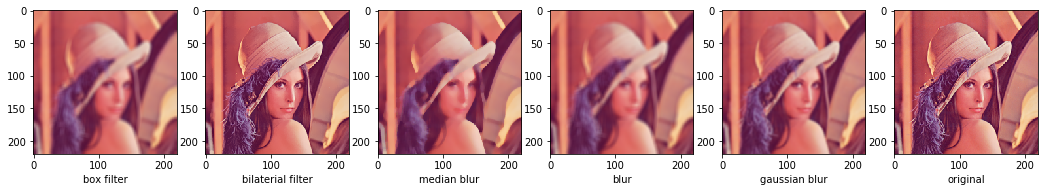

In [32]:
plt.figure(figsize=(18,100))

plt.subplot(1,6,1)
plt.imshow(dst1)
plt.xlabel("box filter")

plt.subplot(1,6,2)
plt.imshow(dst2)
plt.xlabel("bilaterial filter")

plt.subplot(1,6,3)
plt.imshow(dst3)
plt.xlabel("median blur")

plt.subplot(1,6,4)
plt.imshow(dst4)
plt.xlabel("blur")

plt.subplot(1,6,5)
plt.imshow(dst5)
plt.xlabel("gaussian blur")

plt.subplot(1,6,6)
plt.imshow(src)
plt.xlabel("original")

plt.show()

### 미분 필터

In [57]:
gx=cv2.Sobel(src,cv2.CV_32F,1,0,ksize=3)
gx=cv2.convertScaleAbs(gx)
gy=cv2.Sobel(src,cv2.CV_32F,0,1,ksize=3)
gy=cv2.convertScaleAbs(gy)
g=cv2.Sobel(src,cv2.CV_32F,1,1,ksize=3)
g=cv2.convertScaleAbs(g)

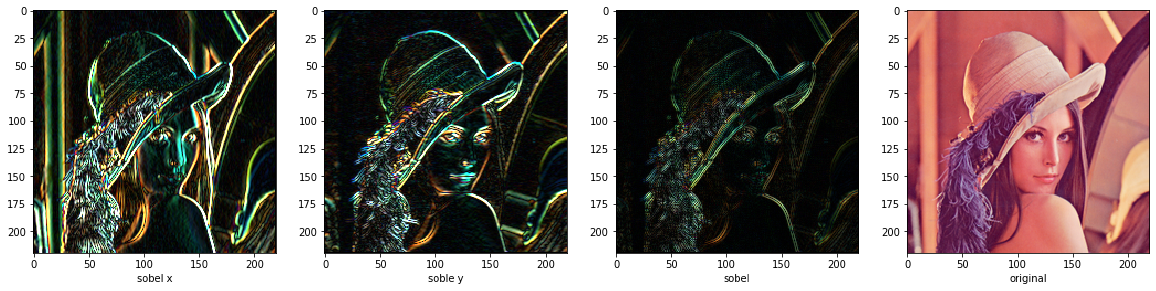

In [58]:
plt.figure(figsize=(20,100))

plt.subplot(1,4,1)
plt.imshow(gx)
plt.xlabel("sobel x")

plt.subplot(1,4,2)
plt.imshow(gy)
plt.xlabel("soble y")

plt.subplot(1,4,3)
plt.imshow(g)
plt.xlabel("sobel")

plt.subplot(1,4,4)
plt.imshow(src)
plt.xlabel("original")

plt.show()

In [55]:
lap=cv2.Laplacian(src,cv2.CV_32F)
lap=cv2.convertScaleAbs(lap)

blur=cv2.GaussianBlur(src,ksize=(3,3),sigmaX=0.0)
blur_lap=cv2.Laplacian(blur,cv2.CV_32F)
blur_lap=cv2.convertScaleAbs(blur_lap)

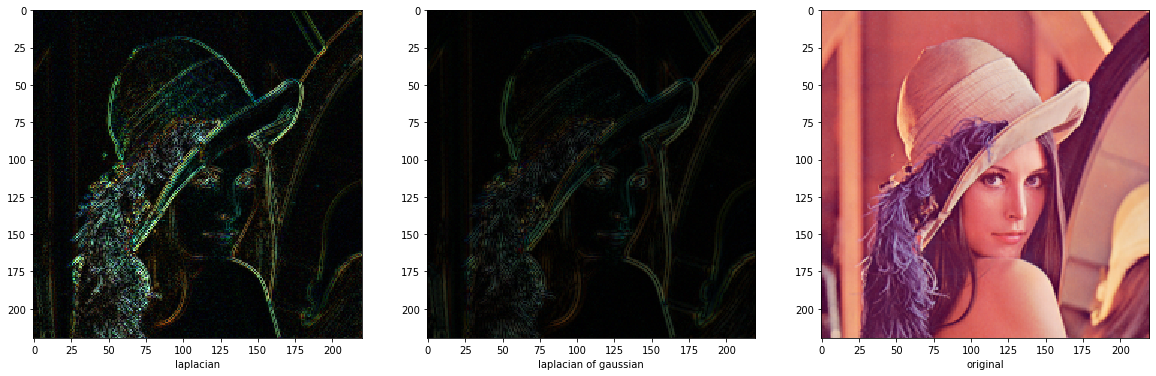

In [56]:
plt.figure(figsize=(20,100))

plt.subplot(1,3,1)
plt.imshow(lap)
plt.xlabel("laplacian")

plt.subplot(1,3,2)
plt.imshow(blur_lap)
plt.xlabel("laplacian of gaussian")

plt.subplot(1,3,3)
plt.imshow(src)
plt.xlabel("original")

plt.show()

### 모폴로지 연산 Morporlogical Operation

- erode(침식하다) : 커널이 이미지를 통과하면서 커널 밑에 있는 모든 픽셀이 1일때만 1로 간주하고 그거 외에는 다 0으로 만든다.  
- dilate(팽창하다) : erode의 반대이다. 커널밑에 있는 픽셀 중 적어도 하나가 1이라면 1로 간주한다.  
- opening : erosion -> dilation 순서로 실행한 것이다. 배경의 노이즈 제거 시 유용하다.  
- closing : dilation-> erosion 순서로 실행한 것이다. 전경의 노이즈 제거 시 유용  
 

In [63]:
gray=cv2.imread("Lenna.png",cv2.IMREAD_GRAYSCALE)

kernel=cv2.getStructuringElement(shape=cv2.MORPH_RECT,ksize=(3,3))

erode1=cv2.erode(gray,kernel,iterations=5)
dilate1=cv2.dilate(gray,kernel,iterations=5)
erode2=cv2.erode(dilate1,kernel,iterations=5)
dilate2=cv2.dilate(erode1,kernel,iterations=5)

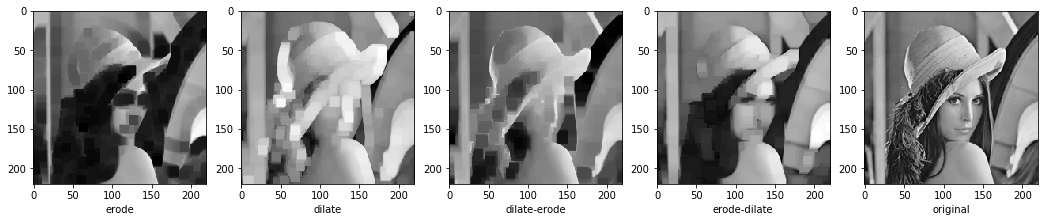

In [69]:
plt.figure(figsize=(18,100))

plt.subplot(1,5,1)
plt.imshow(erode1,cmap='gray')
plt.xlabel("erode")

plt.subplot(1,5,2)
plt.imshow(dilate1,cmap='gray')
plt.xlabel("dilate")

plt.subplot(1,5,3)
plt.imshow(erode2,cmap='gray')
plt.xlabel("dilate-erode")

plt.subplot(1,5,4)
plt.imshow(dilate2,cmap='gray')
plt.xlabel("erode-dilate")

plt.subplot(1,5,5)
plt.imshow(gray,cmap='gray')
plt.xlabel("original")

plt.show()

In [70]:
kernel=cv2.getStructuringElement(shape=cv2.MORPH_RECT,ksize=(3,3))

closing=cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel,iterations=5)
opening=cv2.morphologyEx(gray,cv2.MORPH_OPEN,kernel,iterations=5)
close_open=cv2.morphologyEx(closing,cv2.MORPH_OPEN,kernel,iterations=5)
open_close=cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel,iterations=5)

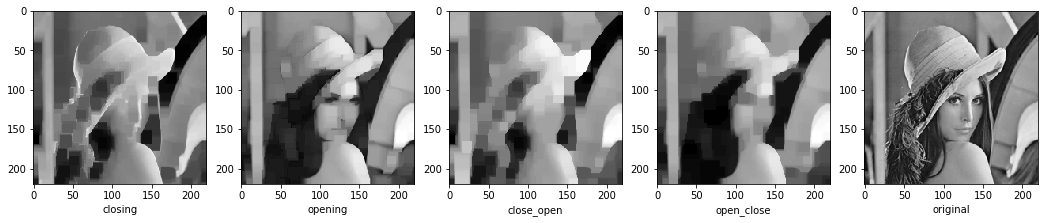

In [71]:
plt.figure(figsize=(18,100))

plt.subplot(1,5,1)
plt.imshow(closing,cmap='gray')
plt.xlabel("closing")

plt.subplot(1,5,2)
plt.imshow(opening,cmap='gray')
plt.xlabel("opening")

plt.subplot(1,5,3)
plt.imshow(close_open,cmap='gray')
plt.xlabel("close_open")

plt.subplot(1,5,4)
plt.imshow(open_close,cmap='gray')
plt.xlabel("open_close")

plt.subplot(1,5,5)
plt.imshow(gray,cmap='gray')
plt.xlabel("original")

plt.show()